<a href="https://colab.research.google.com/github/MahmoudHamdySH/Assighnment-3/blob/main/Auto_encoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
import numpy as np 
import matplotlib.pyplot as plt


In [6]:
(train_X, train_y),(test_X,test_y)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


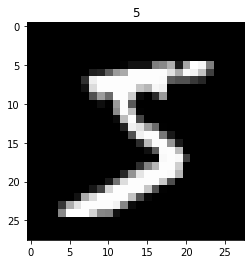

In [9]:
plt.imshow(train_X[0], cmap='gray')
plt.title(train_y[0])
plt.show()

In [10]:
#each pixle 0-->255

In [11]:
train_X = train_X/255
test_X = test_X/255

In [16]:
train_X[0].shape

(28, 28)

##Model

In [35]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Reshape,Input

In [39]:
latent_size=32
encoder=Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(512))
encoder.add(Dropout(0.5))
encoder.add(Dense(128))
encoder.add(Dropout(0.5))
encoder.add(Dense(64))
encoder.add(Dropout(0.5))
encoder.add(Dense(latent_size,activation='sigmoid'))

In [41]:
# decoder Archeticture

decoder = Sequential()
decoder.add(Dense(64,input_shape=(latent_size,)))
decoder.add(Dropout(0.5))
decoder.add(Dense(128))
decoder.add(Dropout(0.5))
decoder.add(Dense(512))
decoder.add(Dropout(0.5))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))


In [42]:
img=Input(shape=(28,28))
latent_vector=encoder(img)
output=decoder(latent_vector)

In [46]:
model=Model(inputs=img,outputs=output)
model.compile(loss='binary_crossentropy',optimizer="adam")

In [47]:
from IPython import display

1/1 [==============================] - 0s 20ms/step


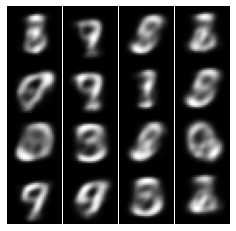

Epoch :  191
598/938 [==================>...........] - ETA: 7s - loss: 0.2137

In [ ]:
from random import randint
epochs=1000

for epoch in range(epochs):

  print("Epoch : ",epoch)
  model.fit(train_X,train_X,batch_size=64)
  fig,axs=plt.subplots(4,4,figsize=(4,4,))
  rand=test_X[np.random.randint(0,10000,16)].reshape((4,4,1,28,28))

  display.clear_output()

  for i in range(4):
    for j in range(4):
      axs[i,j].imshow(model.predict(rand[i,j])[0],cmap="gray")
      axs[i,j].axis("off")


  plt.subplots_adjust(wspace=0,hspace=0)
  plt.show()

